# 부스팅(Boosting)

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()

In [ ]:
import pandas as pd
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print(df.shape)
df.head()

(178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
import numpy as np
np.unique(wine.target, return_counts=True)

(array([0, 1, 2]), array([59, 71, 48]))

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, test_size=0.2, random_state=2022
)

### 1. XGBoost(eXtra Gradient Boost)
- PC에 설치
<pre>
conda activate base
conda install -c anaconda py-xgboost
</pre>

###  현존 머신러닝 모델중 가장 우월한 XGBoost 모델
* boost란 여러 개의 약한 의사결정나무(Decision Tree)를 조합해서 사용하는 앙상블(Ensemble) 기법 중 하나로 약한 예측 모형들의 학습 에러에 가중치를 두고, 순차적으로 다음 학습 모델에 반영하여 강한 예측모형을 만든다.
## XGBoost 란?
* XGBoost는 Extreme Gradient Boosting의 약자이다. 해석하면 극한 변화도(경사도) 부스팅
* Boosting 기법을 이용하여 구현한 알고리즘은 Gradient Boost 가 대표적
이 알고리즘을 병렬 학습이 지원되도록 구현한 라이브러리가 XGBoost 이다.
* Regression, Classification 문제를 모두 지원하며, 성능과 자원 효율이 좋아서, 인기 있게 사용되는 알고리즘 이다.
* XGBoost의 장점
* GBM 대비 빠른 수행시간
* 병렬 처리로 학습, 분류 속도가 빠르다.
* 과적합 규제(Regularization)
* 표준 GBM 경우 과적합 규제기능이 없으나, XGBoost는 자체에 과적합 규제 기능으로 강한 내구성 지닌다.
* 분류와 회귀영역에서 뛰어난 예측 성능 발휘
* 즉, CART(Classification and regression tree) 앙상블 모델을 사용
Early Stopping(조기 종료) 기능이 있음
* 다양한 옵션을 제공하며 Customizing이 용이하다.
* Missing Values : 결측치를 내부적으로 처리해준다.

In [ ]:
from xgboost import  

In [ ]:
from sklearn.metrics import  

- 시각화

In [ ]:
from xgboost import  
import matplotlib.pyplot as plt

- GridSearchCV :1. 최적의 파라미터를 찾아주고 / 교차검증도이 가능한 라이브러리


In [ ]:
from sklearn.model_selection import  

0.9722222222222222

### 2. LightGBM
- PC에 설치
<pre>
conda activate base
conda install -c conda-forge lightgbm
</pre>

* GMB(Gradient Boosting Machine) 이란? 틀린부분에 가중치를 더하면서 진행하는 알고리즘
* Gradient Boosting 프레임워크로 Tree기반 학습 알고리즘입니다. 기존의 다른 Tree기반 알고리즘과 다른점은 Tree구조가 수평적으로 확장하는 다른 Tree기반 알고리즘에 비해 수직적으로 확장을 하는것에 있습니다.  
* 즉, Light GBM은 leaf-wise인 반면 다른 알고리즘은 level-wise입니다. 

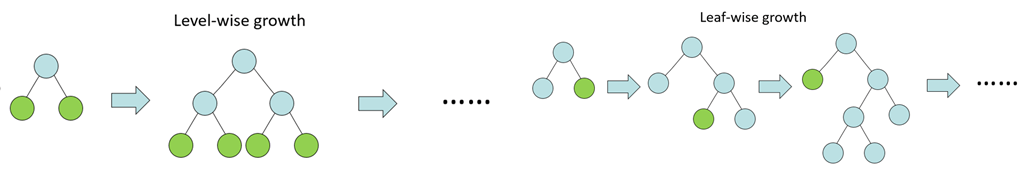

* leaf-wise의 장점은 속도가 빠르다는 것이 가장 큰 장점입니다. 데이타의 양이 많아지는 상황에서 빠른 결과를 얻는데 시간이 점점 많이 걸리고 있습니다.
* Light GBM은 큰 사이즈의 데이타를 다룰 수 있고 실행시킬 때 적은 메모리를 차지합니다. 

In [ ]:
from lightgbm import  

Light GBM의 파라미터에 대해?
LGBM의 경우 복잡한 것은 파라미터 튜닝입니다. Light GBM은 100개 이상의 파라미터를 커버하고 있기 때문입니다.

Light GBM의 가장 베이직한 파라미터를 아는 것이 구현 시 매우 중요합니다. 


1. max_depth : Tree의 최대 깊이를 말합니다. 이 파라미터는 모델 과적합을 다룰 때 사용됩니다. 만약 여러분의 모델이 과적합된 것 같다고 느끼신다면 제 조언은 max_depth 값을 줄이라는 것입니다.

2. min_data_in_leaf : Leaf가 가지고 있는 최소한의 레코드 수입니다. 디폴트값은 20으로 최적 값입니다. 과적합을 해결할 때 사용되는 파라미터입니다.

3. feature_fraction : Boosting (나중에 다뤄질 것입니다) 이 랜덤 포레스트일 경우 사용합니다. 0.8 feature_fraction의 의미는 Light GBM이 Tree를 만들 때 매번 각각의 iteration 반복에서 파라미터 중에서 80%를 랜덤하게 선택하는 것을 의미합니다.

4. bagging_fraction : 매번 iteration을 돌 때 사용되는 데이터의 일부를 선택하는데 트레이닝 속도를 높이고 과적합을 방지할 때 주로 사용됩니다.

5. early_stopping_round : 이 파라미터는 분석 속도를 높이는데 도움이 됩니다. 모델은 만약 어떤 validation 데이터 중 하나의 지표가 지난 early_stopping_round 라운드에서 향상되지 않았다면 학습을 중단합니다. 이는 지나친 iteration을 줄이는데 도움이 됩니다.

6. lambda : lambda 값은 regularization 정규화를 합니다. 일반적인 값의 범위는 0 에서 1 사이입니다.

7. min_gain_to_split : 이 파라미터는 분기하기 위해 필요한 최소한의 gain을 의미합니다. Tree에서 유용한 분기의 수를 컨트롤하는데 사용됩니다.

8. max_cat_group : 카테고리 수가 클 때, 과적합을 방지하는 분기 포인트를 찾습니다. 그래서 Light GBM 알고리즘이 카테고리 그룹을 max_cat_group 그룹으로 합치고 그룹 경계선에서 분기 포인트를 찾습니다. 디폴트 값은 64 입니다.

9. Task : 데이터에 대해서 수행하고자 하는 임무를 구체화합니다. train 트레이닝일 수도 있고 predict 예측일 수도 있습니다.

10. application : 가장 중요한 파라미터로, 모델의 어플리케이션을 정하는데 이것이 regression 회귀분석 문제인지 또는 classification 분류 문제인지를 정합니다. Light GBM에서 디폴트는 regression 회귀분석 모델입니다.

  - regression: 회귀분석
  - binary: 이진 분류
  - multiclass: 다중 분류
  - boosting : 실행하고자 하는 알고리즘 타입을 정의합니다. 디폴트값은 gdbt 입니다.
  - gdbt : Traditional Gradient Boosting Decision Tree
  - rf : Random Forest
  - dart : Dropouts meet Multiple Additive Regression Trees
  - goss : Gradient-based One-Side Sampling
  - num_boost_round : boosting iteration 수로 일반적으로 100 이상입니다.

11. learning_rate : 최종 결과에 대한 각각의 Tree에 영향을 미치는 변수입니다. GBM은 초기의 추정값에서 시작하여 각각의Tree 결과를 사용하여 추정값을 업데이트 합니다. 학습 파라미터는 이러한 추정에서 발생하는 변화의 크기를 컨트롤합니다. 일반적인 값은 0.1, 0.001, 0.003 등등이 있습니다.

12. num_leaves : 전체 Tree의 leave 수 이고, 디폴트값은 31입니다.

13. device : 디폴트 값은 cpu 인데 gpu로 변경할 수도 있습니다.

14. metric : 모델을 구현할 때 손실을 정하기 때문에 중요한 변수 중에 하나입니다. regression과 classification 을 위한 일반적인 손실 값이 아래에 나와있습니다.

  - mae : mean absolute error
  - mse : mean squared error
  - binary_logloss : loss for binary classification
  - multi_logloss : loss for multi classification

In [ ]:
 )

[1]	valid_0's multi_logloss: 0.990435	valid_0's multi_logloss: 0.990435
[2]	valid_0's multi_logloss: 0.908143	valid_0's multi_logloss: 0.908143
[3]	valid_0's multi_logloss: 0.837356	valid_0's multi_logloss: 0.837356
[4]	valid_0's multi_logloss: 0.764444	valid_0's multi_logloss: 0.764444
[5]	valid_0's multi_logloss: 0.704935	valid_0's multi_logloss: 0.704935
[6]	valid_0's multi_logloss: 0.64864	valid_0's multi_logloss: 0.64864
[7]	valid_0's multi_logloss: 0.600436	valid_0's multi_logloss: 0.600436
[8]	valid_0's multi_logloss: 0.552786	valid_0's multi_logloss: 0.552786
[9]	valid_0's multi_logloss: 0.517989	valid_0's multi_logloss: 0.517989
[10]	valid_0's multi_logloss: 0.480141	valid_0's multi_logloss: 0.480141
[11]	valid_0's multi_logloss: 0.451184	valid_0's multi_logloss: 0.451184
[12]	valid_0's multi_logloss: 0.418687	valid_0's multi_logloss: 0.418687
[13]	valid_0's multi_logloss: 0.391787	valid_0's multi_logloss: 0.391787
[14]	valid_0's multi_logloss: 0.367788	valid_0's multi_logloss

LGBMClassifier()

- 시각화

In [ ]:
from lightgbm import  